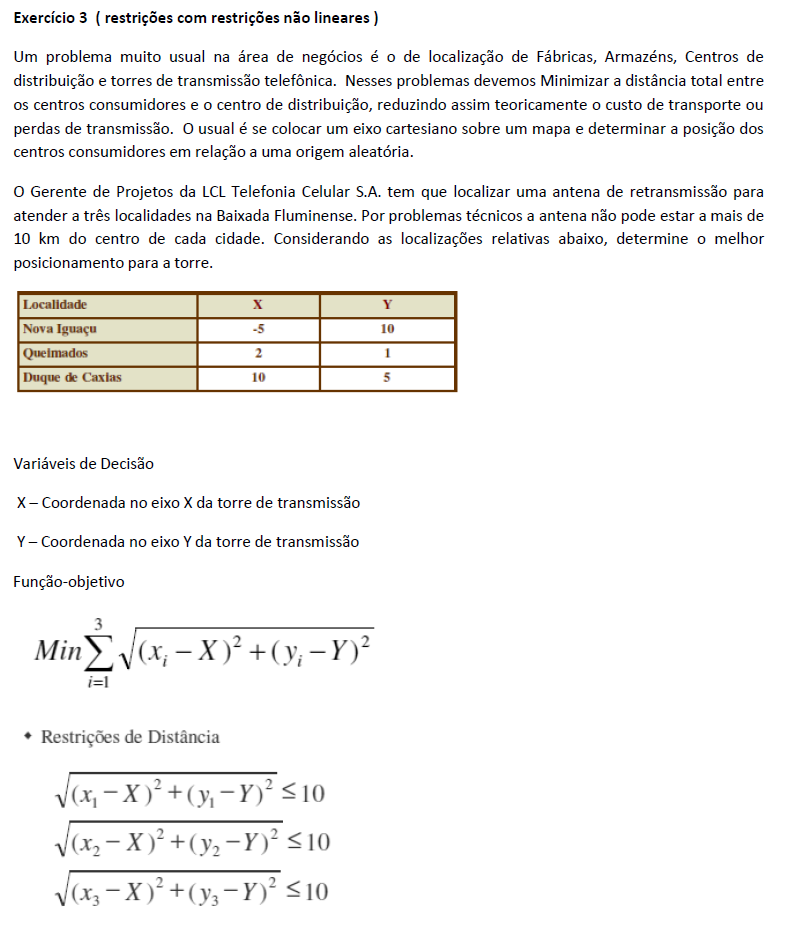

## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [2]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Penalização
3.   Variáveis de Decisão
4.   Operadores



### "Vetorizando o problema"
Criando a matriz e avaliando o código

In [3]:
localidade = np.array([[-5,10],[2,1],[10,5]])
antena = np.array([[0,0]])
localidade - antena

array([[-5, 10],
       [ 2,  1],
       [10,  5]])

In [4]:
quad = (localidade - antena)**2
quad

array([[ 25, 100],
       [  4,   1],
       [100,  25]])

In [5]:
linhas = quad.sum(axis=1)
linhas

array([125,   5, 125])

In [6]:
raiz = np.sqrt(linhas)
raiz

array([11.18033989,  2.23606798, 11.18033989])

In [7]:
min = raiz.sum(axis=0)

In [8]:
min

24.596747752497688

In [9]:
raiz[0]

11.180339887498949

### Definindo Função Objetivo e Restrições

In [10]:
# Função Objetivo
def objective_function(individual):
  localidade = np.array([[-5,10],[2,1],[10,5]])
  antena = np.array([individual])
  quad = (localidade - antena)**2
  linhas = quad.sum(axis=1)
  raiz = np.sqrt(linhas)
  return (raiz.sum(axis=0)),

def feasible(individual):
  localidade = np.array([[-5,10],[2,1],[10,5]])
  antena = np.array([individual])
  quad = (localidade - antena)**2
  linhas = quad.sum(axis=1)
  raiz = np.sqrt(linhas)
  # Distância Antena x Nova Iguaçu
  if raiz[0] > 10 or raiz[0] < -10:
    return False
  # Distância Antena x Queimados
  if raiz[1] > 10 or raiz[1] < -10:
    return False
  # Distância Antena x Duque de Caxias
  if raiz[2] > 10 or raiz[2] < -10:
    return False
  return True

def distance(individual):
  localidade = np.array([[-5,10],[2,1],[10,5]])
  antena = np.array([individual])
  quad = (localidade - antena)**2
  linhas = quad.sum(axis=1)
  raiz = np.sqrt(linhas)
  #definida Penalty Function quadrática conforme: 
  #https://deap.readthedocs.io/en/master/tutorials/advanced/constraints.html
  constraint1 = (raiz[0]-5)**2
  constraint2 = (raiz[1]-5)**2
  constraint3 = (raiz[2]-5)**2
  return (constraint1 + constraint2 + constraint3)

In [11]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))       # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMin)   # indivíduo

In [12]:
toolbox = base.Toolbox()

# Gerador de atributos reais: nome, tipo das variáveis, intervalo (limites inferior e superior)
toolbox.register("attr_real", random.uniform, -10, 10)

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, 2)   # 2: número de variáveis de decisão
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos

In [13]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 0, distance))
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=-10, up=10, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [14]:
pop = toolbox.population(n=150)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Otimização

In [15]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=1000, stats=stats, halloffame=hof)

gen	nevals	avg    	std    	min    	max    
0  	150   	193.071	139.124	20.1982	575.933
1  	73    	89.6097	65.3508	20.1576	287.739
2  	80    	43.7832	24.7539	20.1576	142.678
3  	75    	27.3763	10.5647	20.1576	62.0121
4  	82    	23.4996	7.5978 	20.1576	59.9388
5  	80    	22.7829	7.19801	20.1489	54.1501
6  	99    	22.2737	5.4597 	20.1489	44.8162
7  	79    	21.598 	4.81831	20.1489	54.1501
8  	87    	20.6592	2.67288	20.1489	36.746 
9  	85    	22.6514	23.0423	20.1489	289.168
10 	88    	22.2725	19.7105	20.1489	243.642
11 	89    	20.1846	0.43485	20.1489	25.4926
12 	85    	20.1489	3.55271e-15	20.1489	20.1489
13 	86    	21.8855	18.3812    	20.1489	243.642
14 	67    	20.1489	3.55271e-15	20.1489	20.1489
15 	73    	22.4942	22.2379    	20.1489	277.055
16 	78    	20.5397	4.76989    	20.1489	78.7637
17 	80    	20.1489	3.55271e-15	20.1489	20.1489
18 	81    	20.1489	3.55271e-15	20.1489	20.1489
19 	79    	20.1603	0.138895   	20.1489	21.8557
20 	91    	20.6769	6.40298    	20.1489	98.8335
21 	70    	20.1489

## Resultados

In [16]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[2.333562247371418, 3.6057529886697033]
Melhor Resultado da Função Objetivo:


(20.148927842681726,)

### Gráfico da Evolução

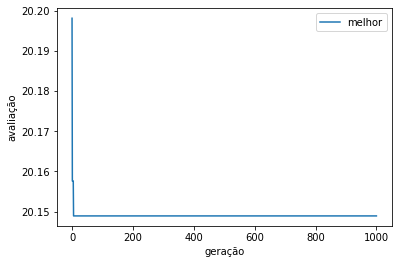

In [17]:
import matplotlib.pyplot as plt
gen, min, avg = log.select('gen', 'min', 'avg')
plt.plot(gen, min, label='melhor')
# plt.plot(gen, avg, label='média')
plt.ylabel('avaliação')
plt.xlabel('geração')
plt.legend();

###Analise do resultado:

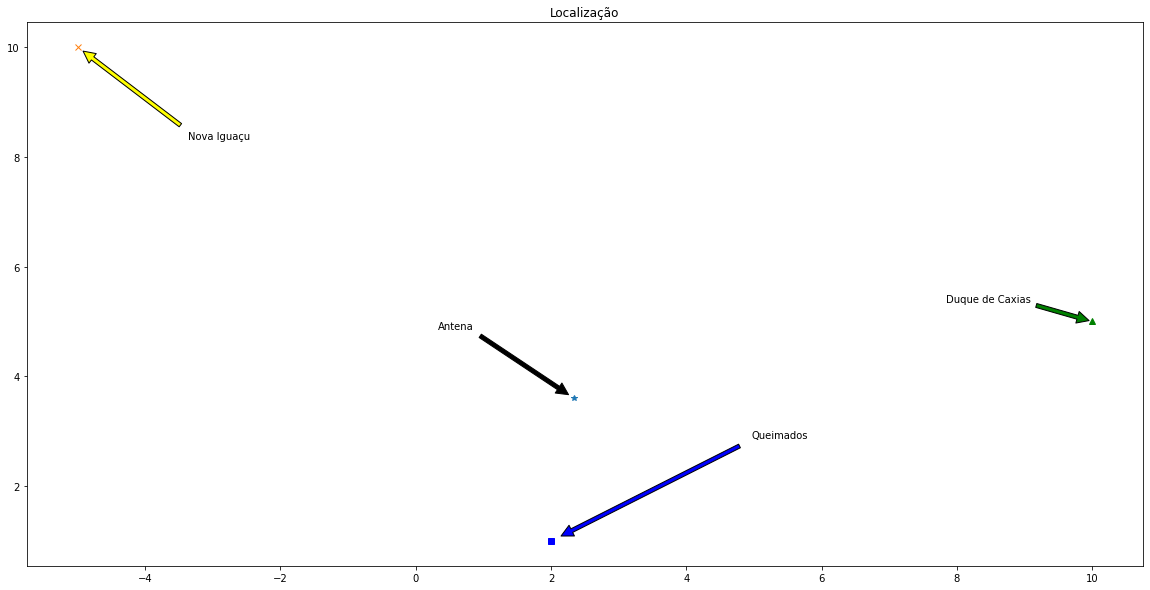

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(hof[0][0], hof[0][1], "*",
         localidade[0][0], localidade[0][1],'x', 
         localidade[1][0], localidade[1][1], 'bs', 
         localidade[2][0], localidade[2][1], 'g^')
ax.set_title('Localização')

ax.annotate('Antena', xy=(hof[0][0], hof[0][1]),  xycoords='data',
            xytext=(0.4, 0.45), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',)

ax.annotate('Nova Iguaçu', xy=(localidade[0][0], localidade[0][1]),  xycoords='data',
            xytext=(0.2, 0.8), textcoords='axes fraction',
            arrowprops=dict(facecolor='yellow', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',)

ax.annotate('Queimados', xy=(localidade[1][0], localidade[1][1]),  xycoords='data',
            xytext=(0.7, 0.25), textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',)

ax.annotate('Duque de Caxias', xy=(localidade[2][0], localidade[2][1]),  xycoords='data',
            xytext=(0.9, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='green', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',)

plt.show()

In [19]:
objective_function(hof[0])

(20.148927842681726,)

In [20]:
feasible(hof[0])

True

In [21]:
distance(hof[0])

35.79765660552531

In [22]:
localidade = np.array([[-5,10],[2,1],[10,5]])
antena = np.array([hof[0]])
antena

array([[2.33356225, 3.60575299]])

In [23]:
quad = (localidade - antena)**2
quad

array([[53.78113524, 40.88639484],
       [ 0.11126377,  6.78994864],
       [58.77426781,  1.94392473]])

In [24]:
linhas = quad.sum(axis=1)
linhas

array([94.66753008,  6.90121241, 60.71819254])

In [25]:
raiz = np.sqrt(linhas)
raiz

array([9.72972405, 2.62701588, 7.79218792])

In [26]:
raiz.sum(axis=0)

20.148927842681726